In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#importing neccessary packages


In [2]:
audi_path = "/Users/Maciek/Desktop/audi_used_car_listings_project/audi.csv" #filepath on hard drive

data = pd.read_csv(audi_path) #loading in the data

In [3]:
data.head() #viewing the first few rows

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
data.info() #displaying info about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


The data set consists of 9 columns, each with 10 668 rows.

In [5]:
data.describe() #more info about columns

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
def visuals(ax):
    
    ### A function to change the visual appearence of a plot. It removes gridlines, spines and changes fonts
    
    plt.tick_params(top=False, bottom=False, left=False, right=False) #diabling tick marks 
    plt.tick_params(direction='out', length=2, width=0.5, grid_alpha=0.5) 
    plt.yticks(fontsize='12', fontfamily='sans-serif')
    plt.xticks(fontsize='12', fontfamily='sans-serif') #setting properties of ticks

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)#disabling spines of the plot

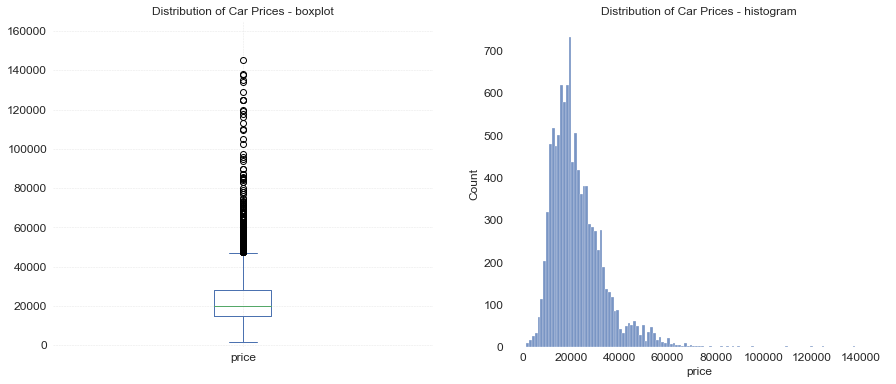

In [7]:
#plt.style.use('seaborn') #setting the overall style of visualizations as 'seaborn'
sns.set_theme(style='white')

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)

visuals(ax1)

data['price'].plot(kind='box', showfliers=True)#creating boxplot
#sns.boxplot(x='price', ax=ax1, data=data)
#visuals()

plt.ylim(-1000,165000)
plt.grid(linestyle='--', linewidth=0.5)

ax1.set_title('Distribution of Car Prices - boxplot')

ax2 = fig.add_subplot(1,2,2)

sns.histplot(data=data, x='price', ax=ax2)

visuals(ax2)

ax2.set_title('Distribution of Car Prices - histogram')

plt.show()

In [8]:
print('Median price: ', int(data['price'].median())) #calculating the median
print('Average price: ', int(data['price'].mean())) #calculating the mean
data['price'].quantile([0.25, 0.75]) #calculating the 1st and the 3rd quantiles

Median price:  20200
Average price:  22896


0.25    15130.75
0.75    27990.00
Name: price, dtype: float64

Median price is 20,200 while the average totals 22,896. As can be seen on a plot above, the prices are higly concentrated around the median, their spread is small, 50% of the cars are priced between 15,000 and 28,000. The plot shows also a high number of outliers, cars that are costing more than approx. 50,000.

In [9]:
third_quant = data['price'].quantile(0.75)
first_quant = data['price'].quantile(0.25) #calculating 1st and 3rd quantile and saving them to variables

IQR = third_quant - first_quant #calculating the interquantile range of the dataset
max_of_dist = third_quant + 1.5*IQR #calculating the maximum of the distribution
print(max_of_dist)

outliers = data[data['price']>max_of_dist] #creating a dataset with outliers
outliers.head()

47278.875


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
198,Q7,2020,62985,Semi-Auto,10,Diesel,145,33.2,3.0
221,Q7,2019,49985,Automatic,10,Diesel,145,33.2,3.0
222,Q7,2019,59995,Automatic,10,Diesel,145,33.2,3.0
223,Q5,2020,47895,Semi-Auto,10,Petrol,145,30.7,2.0
247,Q7,2019,56985,Automatic,1510,Diesel,145,33.2,3.0


In [10]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 198 to 10648
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         443 non-null    object 
 1   year          443 non-null    int64  
 2   price         443 non-null    int64  
 3   transmission  443 non-null    object 
 4   mileage       443 non-null    int64  
 5   fuelType      443 non-null    object 
 6   tax           443 non-null    int64  
 7   mpg           443 non-null    float64
 8   engineSize    443 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 34.6+ KB


In [11]:
outliers['model'].value_counts()

 Q7     170
 Q8      69
 Q5      47
 RS6     27
 R8      26
 RS4     23
 RS5     22
 A8      15
 A6      12
 TT      11
 A7       8
 A4       5
 SQ7      4
 SQ5      2
 RS3      1
 A5       1
Name: model, dtype: int64

There are 443 outliers (defined as records outside of 1.5*IQR limit) most of those are models Q7, big, expensive SUV. Others include sport versions and limousines of Audi lineup.

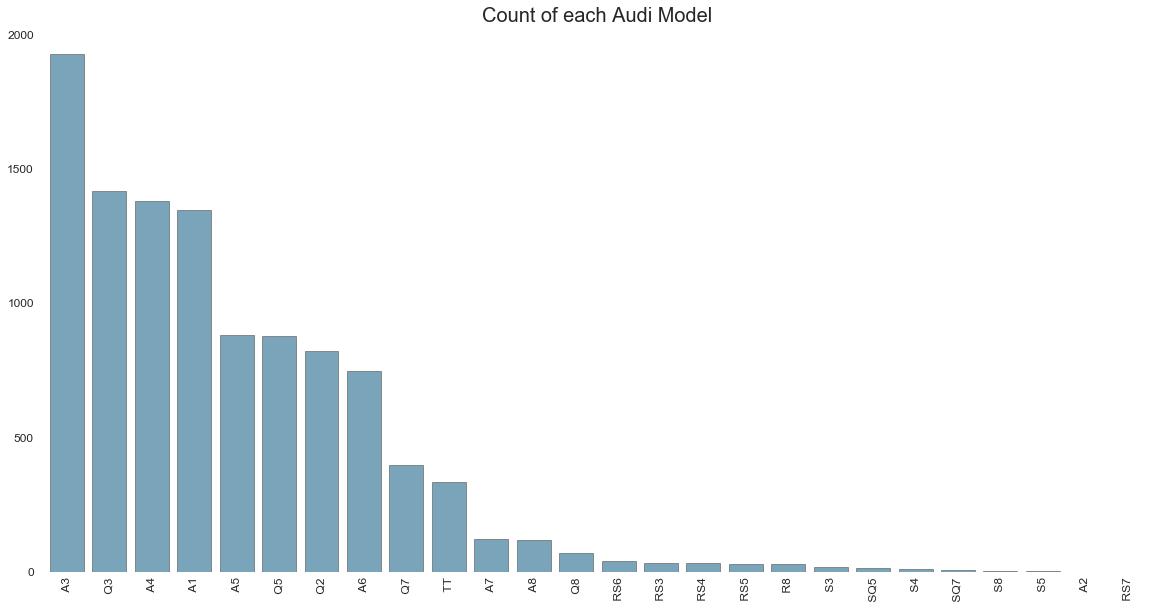

In [12]:
cmap1 = sns.diverging_palette(230, 20, as_cmap=True)

fig, ax = plt.subplots()
data['model'].value_counts().plot(kind='bar', figsize=[20,10],
                                  width=0.8, alpha=0.7, cmap=cmap1,
                                  edgecolor='dimgray') #setting up the figure and the plot

ax.set_yticks(np.arange(0,2001,step=500)) #getting rid of some y labels to make the plot cleaner

visuals(ax) #applying the visuals() function to change the visuals of the plot
#ax.spines['bottom'].set_visible(True)
plt.title('Count of each Audi Model', fontsize=20)
plt.show()


On a chart above the counts of all the available models in the dataset are displayed. The most popular Audi model is undoubtedly A3 which stands at over 1,900 units, then there's a SUV model Q3 with over 1,400 and A4 and A1 are closely behind.

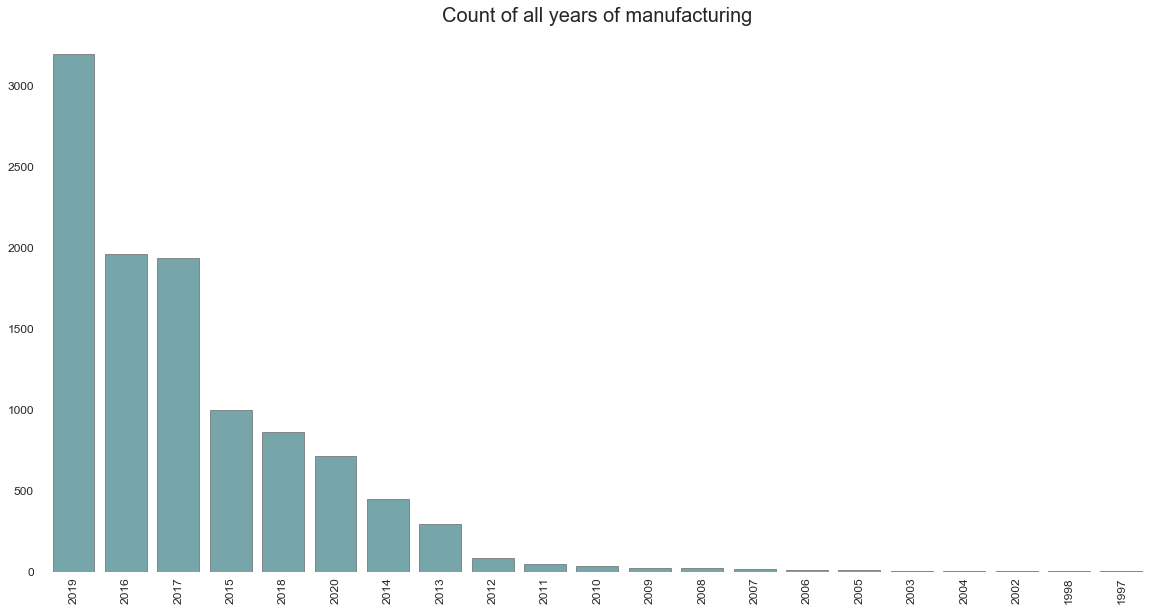

In [13]:
cmap2 = sns.diverging_palette(200, 20, as_cmap=True)

fig, ax = plt.subplots()
data['year'].value_counts().plot(kind='bar', figsize=[20,10],
                                 width=0.8, alpha=0.7, cmap=cmap2,
                                 edgecolor='dimgray') #setting up the figure and the plot

ax.set_yticks(np.arange(0,3001,step=500)) #getting rid of some y labels to make the plot cleaner

visuals(ax)

plt.title('Count of all years of manufacturing', fontsize=20)

plt.show()

Year of production for the given models are mostly recent. The most popular year is 2019 with over 3000 postings. Almost two thousand cars are from the year 2016 and 2017 as well. Cars older than 10 years are in essence no existant in this database.

In [14]:
data['year'].where(data['year']<2010).value_counts() #finding the number of cars that are older than 2010


2009.0    23
2008.0    21
2007.0    16
2006.0     9
2005.0     7
2003.0     6
2004.0     5
2002.0     2
1998.0     1
1997.0     1
Name: year, dtype: int64

As can be seen in a Table above, there are only a handful of 'old' cars in the dataset.

In [15]:
#g = sns.FacetGrid(data, col='transmission', row='fuelType', height=5, aspect=1)
#g.map(sns.scatterplot, 'price', 'engineSize')
#plt.show()

Text(0.5, 1, 'Correlation Matrix')

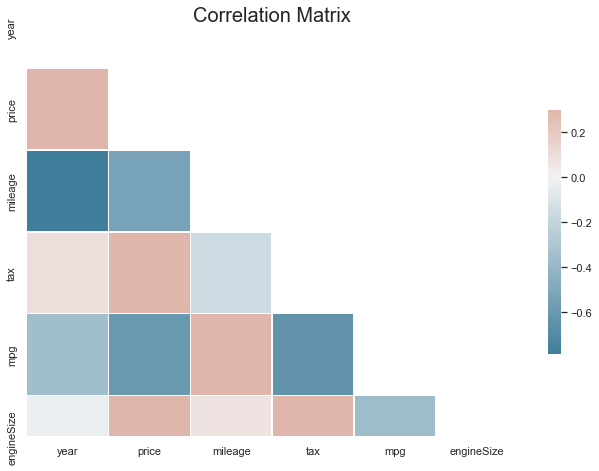

In [16]:
# Computing the correlation matrix
corr = data.corr()

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generating a custom diverging colormap
cmap3 = sns.diverging_palette(230, 20, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap3, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix', fontsize=20)

Plot above shows the correlations between different columns in the dataset. As can be seen, the highest positively correlated columns are price and tax - which makes sense, since price is tax's base. Also price and year - newer cars are more expensive. Mileage and miles per gallon - older cars tend to have less efficient engines which translates to higher mpgs. Price and engine size are also positively correlated - the bigger the engine the higher the price. As to the negatively correlated columns, the biggest value is assigned to year-mileage pair, which basically means that the older the car is the bigger mileage it has - makes sense. Price and mileage work on the same basis. Price and mileage basically means that the priciest cars tend to have bigger, more fuel-hungry engines. 
<br>
What is important, all columns seem to be at least a little correlated, thus can be useful as features in predicting the price

## Creating a model that predicts car prices

# Cells in the following subsection are out of the analysis - the methodology is wrong

### Creating dummy variables - version 1 - THAT'S NOT HOW IT'S DONE!!!!

# Below a proper analysis starts

### Building a model

In [20]:
#importing the neccessary tools from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

train_data, test_data = train_test_split(data, test_size=.8, random_state=1) #splitting the data into train and test set

In [21]:
features = ['model_dummy', 'transmission_dummy', 'fuelType_dummy'] #defining features
target = 'price' #defining target

In [22]:
train_X = train_data[features] #creating a feature and target variables for both training and testing
train_y = train_data[target]

test_X = test_data[features]
test_y = test_data[target]

In [23]:
linreg = LinearRegression() #building the models engine

linreg.fit(train_X, train_y) #fitting training data
pred_y = linreg.predict(test_X) #predicting prices with test data 

### Assessing model's initial performance

In [24]:
mse = mean_squared_error(pred_y, test_y) #calculating performance metrics 
rmse = np.sqrt(mse)

r_squared = r2_score(pred_y, test_y)

mae = mean_absolute_error(pred_y, test_y)

In [25]:
rmse

10842.696980919753

In [26]:
r_squared

-4.087469540062167

In [27]:
mae

7729.437709676802

The models performance seems to be very low. as r_squared is negative. This can be due to several reasons that are further investigated below.

## Optimizing the model

### creting dummy variables - version 2

In [28]:
dummies = pd.get_dummies(data[categorical_variables]) #creating dummy variables out of categorical columns

In [29]:
data2 = pd.concat([data, dummies], axis=1) #concatenating the dummies with original data

In [30]:
data2.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'model_dummy', 'transmission_dummy',
       'fuelType_dummy', 'model_ A1', 'model_ A2', 'model_ A3', 'model_ A4',
       'model_ A5', 'model_ A6', 'model_ A7', 'model_ A8', 'model_ Q2',
       'model_ Q3', 'model_ Q5', 'model_ Q7', 'model_ Q8', 'model_ R8',
       'model_ RS3', 'model_ RS4', 'model_ RS5', 'model_ RS6', 'model_ RS7',
       'model_ S3', 'model_ S4', 'model_ S5', 'model_ S8', 'model_ SQ5',
       'model_ SQ7', 'model_ TT', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Petrol'],
      dtype='object')

In [31]:
train_data2, test_data2 = train_test_split(data2, test_size=.8, random_state=1) #splitting the data into train and test datasets

In [34]:
train_X2 = train_data2.drop(['model', 'transmission', 'fuelType', 'price'], axis=1) #choosing the features
train_y2 = train_data2['price'] #choosing the target

test_X2 = test_data2.drop(['model', 'transmission', 'fuelType', 'price'], axis=1)
test_y2 = test_data2['price']

In [36]:
linreg2 = LinearRegression() #building the regression engine

linreg2.fit(train_X2, train_y2) #fitting data
pred_y2 = linreg2.predict(test_X2) # predicting price

In [37]:
mse2 = mean_squared_error(pred_y2, test_y2) #calculating performance metrics 
rmse2 = np.sqrt(mse2)

r_squared2 = r2_score(pred_y2, test_y2)

mae2 = mean_absolute_error(pred_y2, test_y2)

In [38]:
rmse2

3930.769570189979

In [39]:
r_squared2

0.8774707778893072

In [40]:
mae2

2622.4286810158524

In [213]:
def performance_measure(data, feature_list, target, test_size=0.8):
    
    #this function computes the preformance metrics of a linear regression model using given parameters
    #data -> dataset used
    #feature_list -> names of the columns to be used as features
    #target -> value that the model is gonna be predicting and measuring against
    #test_size -> the size of the test dataset as a fraction of the whole
    
    train_X, test_X, train_y, test_y = train_test_split(data[feature_list], data[target], test_size=0.8, random_state=0) #splitting the data into training and testing sets
    
    lr = LinearRegression() 
    lr.fit(train_X, train_y) #building the model and fitting the data
    
    pred_y = lr.predict(test_X) #predicting price
    
    r_squared = r2_score(pred_y, test_y) #calculating r squared
    rmse = np.sqrt(mean_squared_error(pred_y, test_y)) #calculating root mean squared error
    mae = mean_absolute_error(pred_y, test_y) #calculating mean absolute error
    
    return {'rmse with ' + str(len(feature_list)) + ' features': rmse} # returning the r squared value
    

In [214]:
performance_measure(feature_list=train_X2.columns, data=data2, target='price') #testing the function

{'rmse with 40 features': 4019.1095931698833}

In [215]:
train_X2.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_dummy',
       'transmission_dummy', 'fuelType_dummy', 'model_ A1', 'model_ A2',
       'model_ A3', 'model_ A4', 'model_ A5', 'model_ A6', 'model_ A7',
       'model_ A8', 'model_ Q2', 'model_ Q3', 'model_ Q5', 'model_ Q7',
       'model_ Q8', 'model_ R8', 'model_ RS3', 'model_ RS4', 'model_ RS5',
       'model_ RS6', 'model_ RS7', 'model_ S3', 'model_ S4', 'model_ S5',
       'model_ S8', 'model_ SQ5', 'model_ SQ7', 'model_ TT',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [216]:
data2.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'model_dummy', 'transmission_dummy',
       'fuelType_dummy', 'model_ A1', 'model_ A2', 'model_ A3', 'model_ A4',
       'model_ A5', 'model_ A6', 'model_ A7', 'model_ A8', 'model_ Q2',
       'model_ Q3', 'model_ Q5', 'model_ Q7', 'model_ Q8', 'model_ R8',
       'model_ RS3', 'model_ RS4', 'model_ RS5', 'model_ RS6', 'model_ RS7',
       'model_ S3', 'model_ S4', 'model_ S5', 'model_ S8', 'model_ SQ5',
       'model_ SQ7', 'model_ TT', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Petrol'],
      dtype='object')

In [217]:
#creating a list of all possible features combinations
import itertools

my_features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize']
combinations = []
for L in range(1, len(my_features)+1): 
    for subset in itertools.combinations(my_features, L):
        combinations.append(list(subset))
        


In [218]:
from collections.abc import Iterable


def flatten(lis):
    
    #created by: Ashwini Chaudhary, Steve Mayne
    #function loops through items of a list and checks wheter the item is iterable if yes checks further and
    # finally returns a non-iterable item
    #in essence this function make nested list a one-dimensional one.
    
    for item in lis:
        if isinstance(item, Iterable) and not isinstance(item, str):
            for x in flatten(item):
                yield x
        else:
            yield item

In [219]:
def creating_features(combinations):
    
    #this functions is creating a final list of features to be used in testing performance by iterating through
    #previously created list of combinations and making a similar list but taking into account dummy variables.
    
    
    list_of_final_features = []
    
    for combination in combinations:
        final_features = []
        for feature in combination:
            if "model" is feature:
                model_features = [s for s in dummies.columns if 'model' in s]
                final_features.append(model_features)
            
            if "transmission" is feature:
                transmission_features = [s for s in dummies.columns if 'transmission' in s]
                final_features.append(transmission_features)
        
            if 'fuelType' is feature:
                fuel_features = [s for s in dummies.columns if 'fuelType' in s]
                final_features.append(fuel_features)
        
            elif feature not in ['model', 'transmission', 'fuelType']:
                final_features.append(feature)
            
        list_of_final_features.append(list(flatten(final_features)))

    return list_of_final_features
    

    
    
def regression_feature_testing(list_of_combinations, data):
    
    ##this functions is building a linear regression for each combination of features from given list
    #and computing that models' performance metric and putting them into a dictionary
    #list_of_combinations -> a list of all combinations of features
    
    score_dict = {}
    combination_index = 0
    for combination in list_of_combinations:
    
        
        r_score = performance_measure(data=data, feature_list=combination, target='price') 
        score_dict[combination_index] = r_score
    
        combination_index += 1
    return score_dict
    


In [220]:
regression_feature_testing(creating_features(combinations), data2)

{0: {'rmse with 26 features': 651888189159365.6},
 1: {'rmse with 1 features': 9480.083002536652},
 2: {'rmse with 3 features': 10284.366335381488},
 3: {'rmse with 1 features': 9924.018190597832},
 4: {'rmse with 3 features': 11731.117678757339},
 5: {'rmse with 1 features': 9405.377441491939},
 6: {'rmse with 1 features': 9466.27344387099},
 7: {'rmse with 27 features': 5132.101746141088},
 8: {'rmse with 29 features': 646837952369391.2},
 9: {'rmse with 27 features': 5713.350587928915},
 10: {'rmse with 29 features': 451472786787215.44},
 11: {'rmse with 27 features': 7172.657012629841},
 12: {'rmse with 27 features': 755974474129113.6},
 13: {'rmse with 4 features': 8606.030856914003},
 14: {'rmse with 2 features': 9392.88942524442},
 15: {'rmse with 4 features': 9397.668401810764},
 16: {'rmse with 2 features': 8115.165900926797},
 17: {'rmse with 2 features': 6174.260917187128},
 18: {'rmse with 4 features': 8872.097686767213},
 19: {'rmse with 6 features': 10286.53056978363},
 2

In [1]:
creating_features(combinations)[32] #this is the best combination of features

NameError: name 'creating_features' is not defined